In [90]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from os import getcwd

In [91]:
sign_language_train = pd.read_csv("/tmp/sign_language_train.csv")
sign_language_test = pd.read_csv("/tmp/sign_language_test.csv")

def get_data(filepath):
  rows = len(filepath)
  images = np.arange(784, dtype = "int64")
  total_images = np.full((rows, 28, 28), 3)
  labels = np.full(rows, 1)
  images = [" "] * (rows * 784)

  for i in range(rows):
    images[i] = filepath.iloc[i, 1:785] #selecting ith row of dataframe and fetching only pixel values
    images[i] = np.array(images[i].values) #converting into numpy array
    total_images[i] = np.reshape(images[i], (28,28)) #reshaping array into i, 28,28
    labels[i] = filepath.iloc[i, 0]
  return total_images, labels
  '''
  print(individual_pixels)
  print(total_images[0])
  print(images[0])
  print(labels[0])
  '''

training_images, training_labels = get_data(sign_language_train)
testing_images, testing_labels = get_data(sign_language_test)

print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


In [92]:
training_images = np.expand_dims(training_images, axis = 3) #axis = 3 represents 4th dimension
testing_images = np.expand_dims(testing_images, axis = 3)

print(training_images.shape)
print(testing_images.shape)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [93]:
import keras_preprocessing
from keras_preprocessing import image

#augmenting data and creatng imagedatagen
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

validation_datagen = ImageDataGenerator(
    rescale=1. / 255)

In [103]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(26, activation=tf.nn.softmax)
])

model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 1600)              0         
_________________________________________________________________
dense_24 (Dense)             (None, 128)               204928    
_________________________________________________________________
dense_25 (Dense)             (None, 26)              

In [104]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_datagen.flow(training_images, training_labels, batch_size=32),
                              steps_per_epoch=len(training_images) / 32,
                              epochs=15,
                              validation_data=validation_datagen.flow(testing_images, testing_labels, batch_size=32),
                              validation_steps=len(testing_images) / 32)

model.evaluate(testing_images, testing_labels)
model.save("/tmp/sign.h5")

Epoch 1/15
858/857 [==============================] - 48s 56ms/step - loss: 2.7851 - accuracy: 0.1541 - val_loss: 2.0920 - val_accuracy: 0.3282
Epoch 2/15
858/857 [==============================] - 48s 56ms/step - loss: 2.0830 - accuracy: 0.3368 - val_loss: 1.3676 - val_accuracy: 0.5515
Epoch 3/15
858/857 [==============================] - 51s 59ms/step - loss: 1.7543 - accuracy: 0.4440 - val_loss: 1.1533 - val_accuracy: 0.5633
Epoch 4/15
858/857 [==============================] - 48s 56ms/step - loss: 1.5217 - accuracy: 0.5066 - val_loss: 1.2050 - val_accuracy: 0.5512
Epoch 5/15
858/857 [==============================] - 48s 55ms/step - loss: 1.3664 - accuracy: 0.5536 - val_loss: 0.9300 - val_accuracy: 0.6820
Epoch 6/15
858/857 [==============================] - 47s 55ms/step - loss: 1.2678 - accuracy: 0.5836 - val_loss: 0.8166 - val_accuracy: 0.6944
Epoch 7/15
858/857 [==============================] - 47s 55ms/step - loss: 1.1718 - accuracy: 0.6136 - val_loss: 0.6853 - val_accuracy:

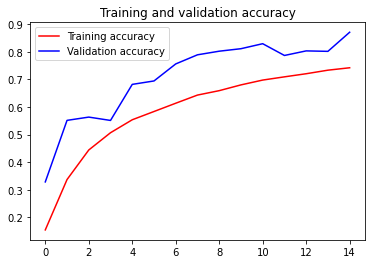

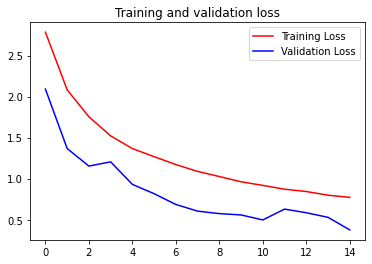

In [105]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


Saving a.png to a (6).png
[[[[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  [[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [0.         0.         0.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  [[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [0.45490196 0.45490196 0.45490196]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  ...

  [[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  [[1.         1.  

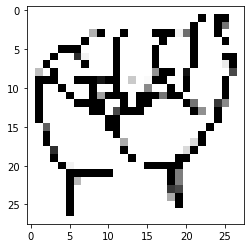

In [106]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(28, 28, 1))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  images /= 255
  print(images)
  print(images.shape)
  plt.imshow(img)

In [118]:
predictions = model.predict(testing_images)

for i in range(15):
  print(predictions[i])
  print(testing_labels[i])
  new_img = np.reshape(testing_images[i], (28, 28))

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
6
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
5
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
10
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
21
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
10
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
14
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
3
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
7
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
8
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
8
